### 자동차 가격 예측 세트

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### 1. 데이터 탐색

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.duplicated().sum()

0

#### 🤔 결측치, 중복치 없음

#### ☝️ 사전 전처리 시작

In [5]:
pre_df = df.copy()
pre_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
pre_df = pre_df.drop(labels=['car_ID'], axis=1)

#### 🤔 자동차 symboling??
symboling 이라는 feature는 자동차에 있는 해당 브랜드 로고의 갯수인데,  
이 갯수가 0개 일 순 있지만 -1, -2개 일 순 없다.  
이상치 제거를 하도록 하겠다.

In [7]:
pre_df = pre_df[(pre_df['symboling'] != -1) & (pre_df['symboling'] != -2)]
pre_df = pre_df.reset_index(drop=True)
pre_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,159.3,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0
176,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.5,165.7,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980.0
177,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,180.2,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
178,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,180.2,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845.0


#### 데이터 분포와 종속변수와 독립변수들간의 상관관계를 확인하기 위해 먼저 라벨인코딩을 해보도록 하겠다.

In [8]:
pre_a_df = pre_df.copy()
pre_a_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,159.3,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0
176,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.5,165.7,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980.0
177,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,180.2,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
178,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,180.2,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845.0


In [9]:
from sklearn.preprocessing import LabelEncoder

columns = ['CarName', 'fueltype', 'aspiration', 'doornumber',
           'carbody', 'drivewheel', 'enginelocation', 'cylindernumber', 'fuelsystem',
           'enginetype']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_df[column])
    label_encoders[column] = encoder.classes_
    pre_a_df[column] = result

pre_a_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,130,1,0,1,0,1,0,94.5,159.3,...,109,5,3.19,3.40,8.5,90,5500,24,29,11595.0
176,3,131,1,0,1,2,1,0,94.5,165.7,...,109,5,3.19,3.40,8.5,90,5500,24,29,9980.0
177,0,126,1,0,0,3,1,0,100.4,180.2,...,136,5,3.19,3.40,8.5,110,5500,19,24,13295.0
178,0,127,0,1,0,3,1,0,100.4,180.2,...,97,3,3.01,3.40,23.0,68,4500,33,38,13845.0


In [10]:
pre_a_df.corr()['price'].sort_values(ascending=False)[1:]

enginesize          0.873425
horsepower          0.828536
curbweight          0.821126
carwidth            0.730390
carlength           0.655583
boreratio           0.559816
fuelsystem          0.553827
drivewheel          0.544622
wheelbase           0.531253
enginelocation      0.357282
aspiration          0.094060
stroke              0.079375
carheight           0.050411
cylindernumber      0.036973
symboling           0.032005
doornumber          0.031545
enginetype          0.028907
fueltype           -0.017983
compressionratio   -0.022734
peakrpm            -0.058356
carbody            -0.151363
CarName            -0.268799
highwaympg         -0.685131
citympg            -0.688504
Name: price, dtype: float64

#### 종속변수와 상관관계가 상대적으로 낮은 'aspiration' ~ 'CarName'까지 삭제해보도록 하겠다.

In [12]:
column = ['aspiration', 'stroke', 'carheight', 'cylindernumber', 'symboling', 'doornumber', 'enginetype',
                   'fueltype', 'compressionratio', 'peakrpm', 'carbody', 'CarName']

pre_df = pre_df.drop(columns=column)
pre_df

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,13495.0
1,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,16500.0
2,rwd,front,94.5,171.2,65.5,2823,152,mpfi,2.68,154,19,26,16500.0
3,fwd,front,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30,13950.0
4,4wd,front,99.4,176.6,66.4,2824,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,fwd,front,94.5,159.3,64.2,2254,109,mpfi,3.19,90,24,29,11595.0
176,fwd,front,94.5,165.7,64.0,2221,109,mpfi,3.19,90,24,29,9980.0
177,fwd,front,100.4,180.2,66.9,2661,136,mpfi,3.19,110,19,24,13295.0
178,fwd,front,100.4,180.2,66.9,2579,97,idi,3.01,68,33,38,13845.0


In [13]:
pre_df.drivewheel.value_counts()

drivewheel
fwd    112
rwd     59
4wd      9
Name: count, dtype: int64

In [14]:
pre_df.enginelocation.value_counts()

enginelocation
front    177
rear       3
Name: count, dtype: int64

In [15]:
pre_df.fuelsystem.value_counts()

fuelsystem
mpfi    77
2bbl    64
idi     15
1bbl    11
spdi     8
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

#### 남아있던 범주형 독립변수들의 비중을 확인 했을 때 엉망이다.  
3개의 독립변수들도 삭제 하도록 하겠다.

In [16]:
# pre_a_df.hist(figsize=(20, 20))

In [17]:
column = ['drivewheel', 'enginelocation', 'fuelsystem']

pre_df = pre_df.drop(columns=column)
pre_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
175,94.5,159.3,64.2,2254,109,3.19,90,24,29,11595.0
176,94.5,165.7,64.0,2221,109,3.19,90,24,29,9980.0
177,100.4,180.2,66.9,2661,136,3.19,110,19,24,13295.0
178,100.4,180.2,66.9,2579,97,3.01,68,33,38,13845.0


#### 사전 전처리 완료

array([[<Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

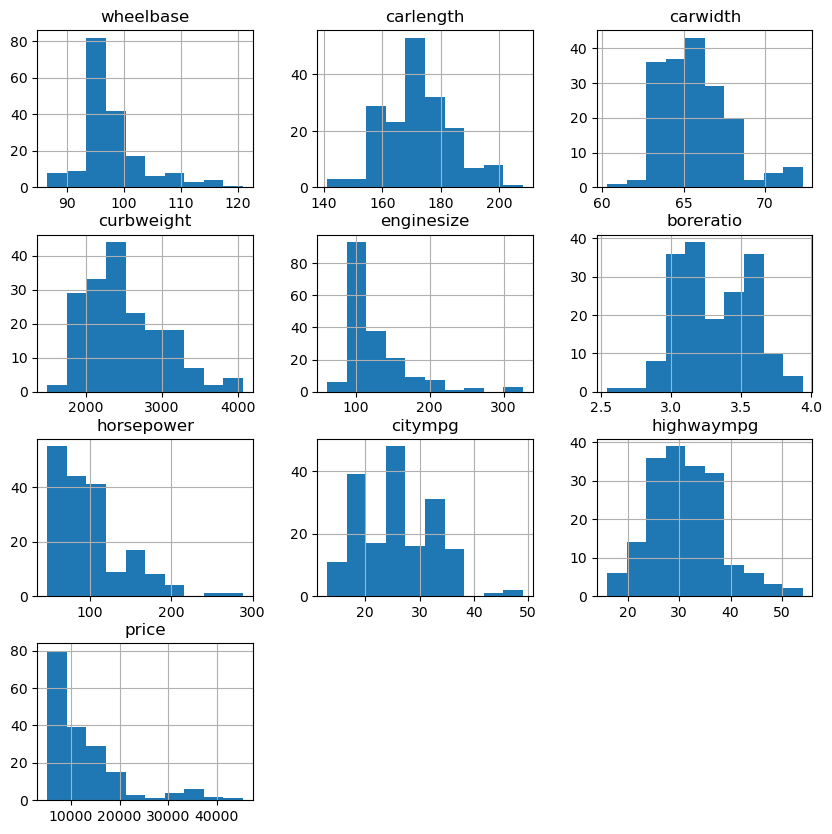

In [18]:
pre_df.hist(figsize=(10, 10))

#### 이상치를 제거 하기 위해 StandardScaler를 사용하도록 하겠다.

In [19]:
from sklearn.preprocessing import StandardScaler

# price를 제외한 독립 변수만 선택
independent_features = pre_df.drop(columns=['price'])

# StandardScaler를 사용하여 독립 변수를 표준화
std = StandardScaler()
result = std.fit_transform(independent_features)
std_pre_df = pd.DataFrame(result, columns=independent_features.columns)

# -1.96과 1.96 사이에 위치하는 값만 남기기
condition = True
for column in std_pre_df.columns:
    condition &= std_pre_df[column].between(-1.96, 1.96)
std_pre_df = std_pre_df[condition]

# 이상치를 제거한 행들의 인덱스를 사용하여 원본 데이터프레임에서 해당 행들을 제거
pre_df = pre_df.iloc[std_pre_df.index].reset_index(drop=True)

pre_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
3,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
4,99.8,177.3,66.3,2507,136,3.19,110,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...
142,94.5,159.3,64.2,2254,109,3.19,90,24,29,11595.0
143,94.5,165.7,64.0,2221,109,3.19,90,24,29,9980.0
144,100.4,180.2,66.9,2661,136,3.19,110,19,24,13295.0
145,100.4,180.2,66.9,2579,97,3.01,68,33,38,13845.0


array([[<Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

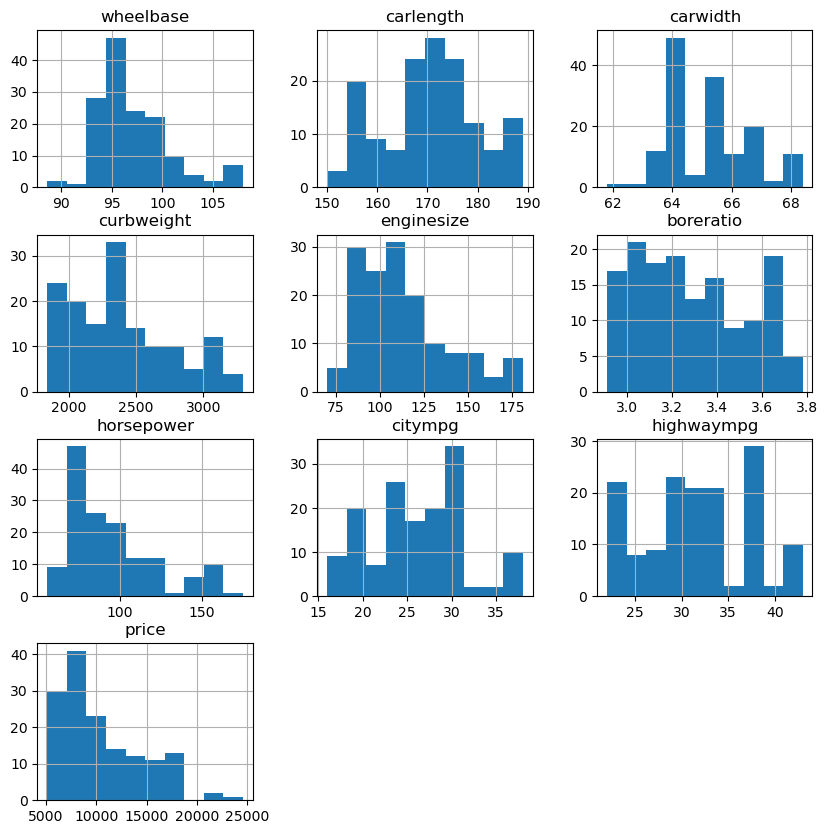

In [20]:
pre_df.hist(figsize=(10, 10))

In [21]:
import numpy as np

pre_df['price'] = np.log1p(pre_df['price'])
pre_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,9.510149
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,9.711176
2,99.8,176.6,66.2,2337,109,3.19,102,24,30,9.543306
3,99.4,176.6,66.4,2824,136,3.19,115,18,22,9.767152
4,99.8,177.3,66.3,2507,136,3.19,110,19,25,9.632400
...,...,...,...,...,...,...,...,...,...,...
142,94.5,159.3,64.2,2254,109,3.19,90,24,29,9.358415
143,94.5,165.7,64.0,2221,109,3.19,90,24,29,9.208439
144,100.4,180.2,66.9,2661,136,3.19,110,19,24,9.495219
145,100.4,180.2,66.9,2579,97,3.01,68,33,38,9.535752


array([[<Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

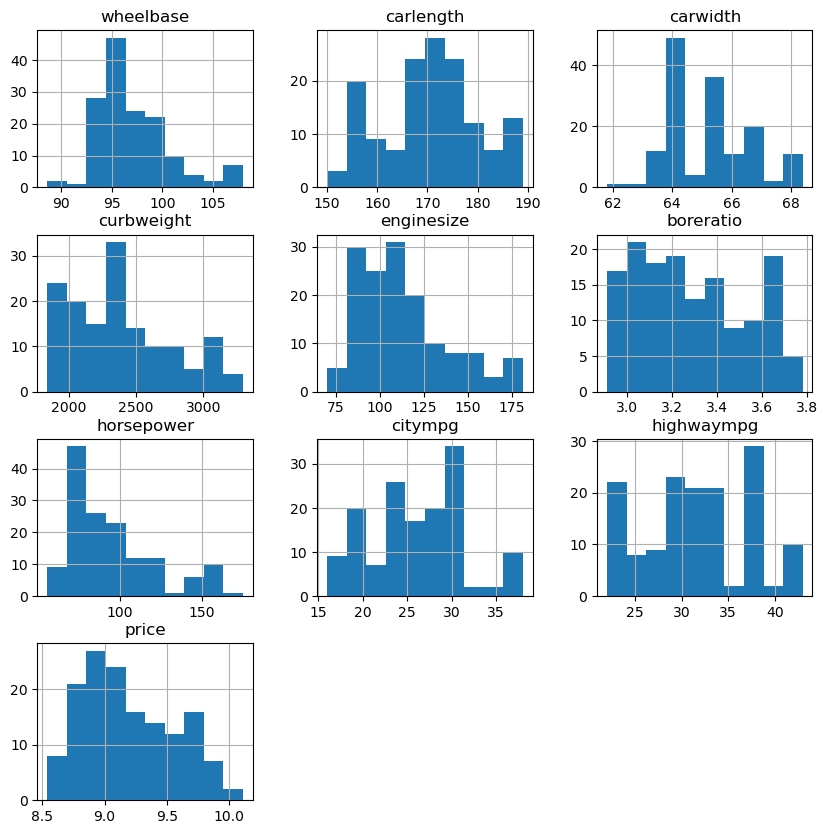

In [22]:
pre_df.hist(figsize=(10, 10))

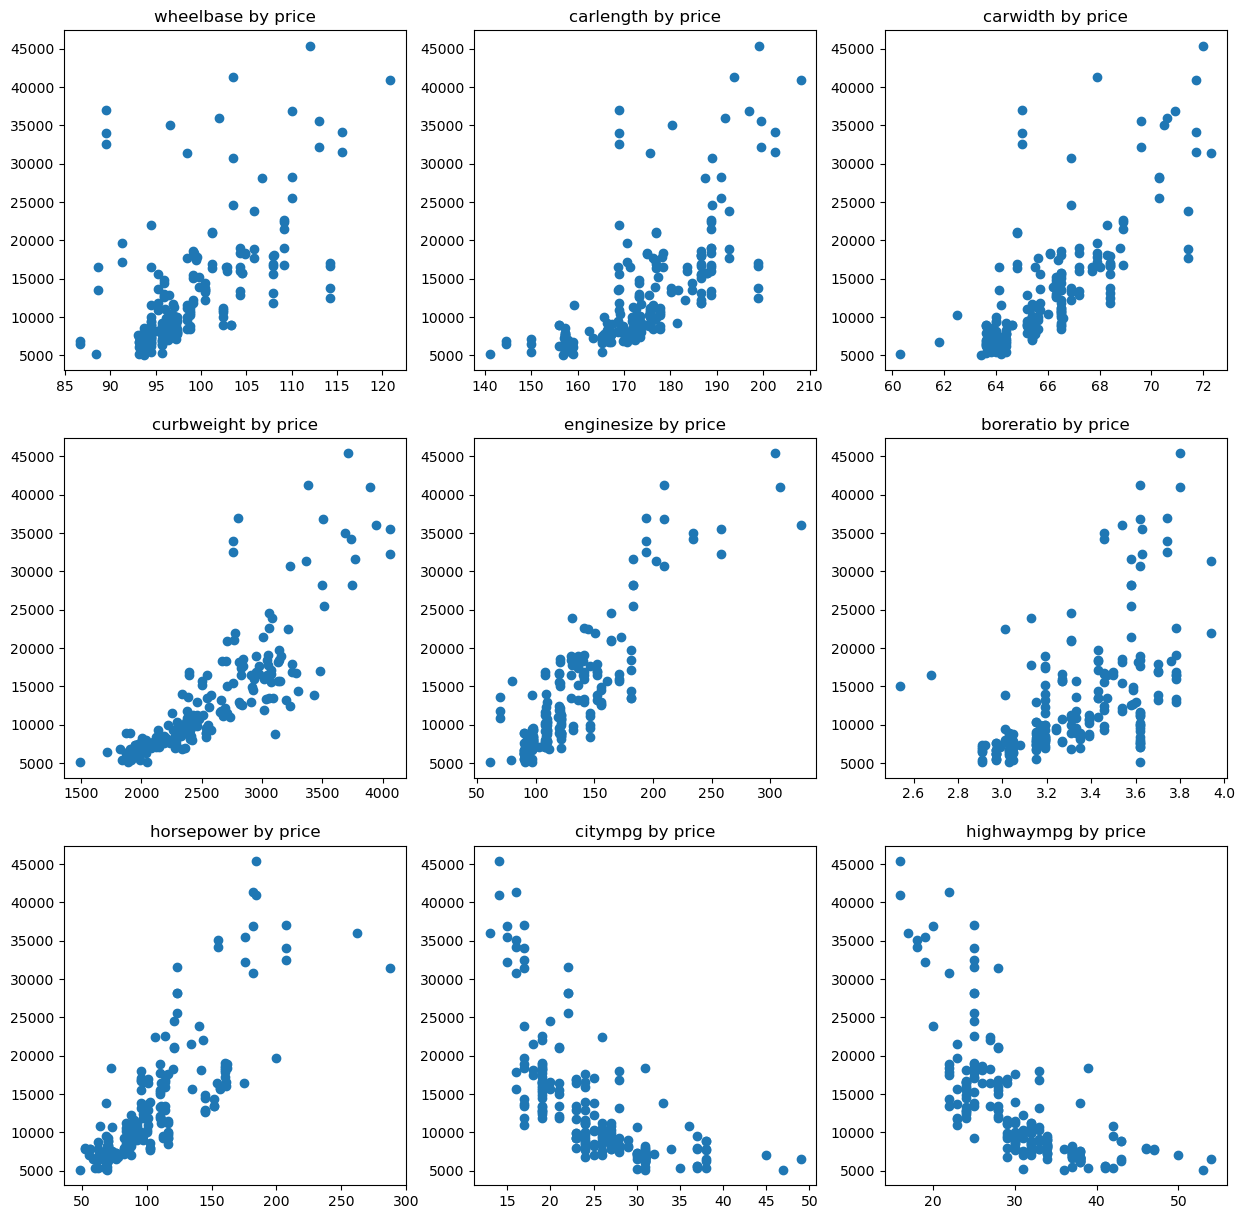

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0, 0].scatter(df['wheelbase'], df['price'])
axes[0, 0].set_title('wheelbase by price')
axes[0, 1].scatter(df['carlength'], df['price'])
axes[0, 1].set_title('carlength by price')
axes[0, 2].scatter(df['carwidth'], df['price'])
axes[0, 2].set_title('carwidth by price')
axes[1, 0].scatter(df['curbweight'], df['price'])
axes[1, 0].set_title('curbweight by price')
axes[1, 1].scatter(df['enginesize'], df['price'])
axes[1, 1].set_title('enginesize by price')
axes[1, 2].scatter(df['boreratio'], df['price'])
axes[1, 2].set_title('boreratio by price')
axes[2, 0].scatter(df['horsepower'], df['price'])
axes[2, 0].set_title('horsepower by price')
axes[2, 1].scatter(df['citympg'], df['price'])
axes[2, 1].set_title('citympg by price')
axes[2, 2].scatter(df['highwaympg'], df['price'])
axes[2, 2].set_title('highwaympg by price')
plt.show()

#### 산점도를 확인 했을 때, 선형인지 비선형인지 조금 애매하다.  
일단 먼저, 최초 훈련을 시켜보도록 하자.

### Cycle1

### Cycle1-1. Multivariate Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    lr_MSE = mean_squared_error(y_test, prediction)
    lr_RMSE = np.sqrt(lr_MSE)
    lr_R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(lr_MSE, lr_RMSE, lr_R2))

In [26]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0368, RMSE: 0.1919, R2: 0.7466


### Cycle1-2. Polynomial Regression Model

In [27]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    po_MSE = mean_squared_error(y_test, prediction)
    po_RMSE = np.sqrt(po_MSE)
    po_MSLE = mean_squared_log_error(y_test, prediction)
    po_RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    po_R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(po_MSE, po_RMSE, po_MSLE, po_RMSLE, po_R2))

In [29]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0223, RMSE: 0.1494, MSLE: 0.0002, RMSLE: 0.0144, R2: 0.8454


### Cycle1-3. Others Regression Model

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=0)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000, n_jobs=-1)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0212, RMSE: 0.1455, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8534
RandomForestRegressor
MSE: 0.0173, RMSE: 0.1317, MSLE: 0.0002, RMSLE: 0.0129, R2: 0.8799
GradientBoostingRegressor
MSE: 0.0184, RMSE: 0.1357, MSLE: 0.0002, RMSLE: 0.0134, R2: 0.8725
XGBRegressor
MSE: 0.0154, RMSE: 0.1240, MSLE: 0.0001, RMSLE: 0.0121, R2: 0.8935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 9
[LightGBM] [Info] Start training from score 9.198399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

1. Multivariate Linear Regression Model  
MSE: 0.0368, RMSE: 0.1919, <strong>R2: 0.7466<strong>  

2. Polynomial Regression Model  
MSE: 0.0223, RMSE: 0.1494, MSLE: 0.0002, RMSLE: 0.0144, <strong>R2: 0.8454<strong>  

3. DecisionTreeRegressor  
MSE: 0.0212, RMSE: 0.1455, MSLE: 0.0002, RMSLE: 0.0142, <strong>R2: 0.8534</strong>  

4. RandomForestRegressor  
MSE: 0.0173, RMSE: 0.1317, MSLE: 0.0002, RMSLE: 0.0129, <strong>R2: 0.8799</strong>  

5. GradientBoostingRegressor  
MSE: 0.0184, RMSE: 0.1357, MSLE: 0.0002, RMSLE: 0.0134, <strong>R2: 0.8725</strong>  

6. XGBRegressor  
MSE: 0.0154, RMSE: 0.1240, MSLE: 0.0001, RMSLE: 0.0121, <strong>R2: 0.8935</strong>  

7. LGBMRegressor  
MSE: 0.0143, RMSE: 0.1195, MSLE: 0.0001, RMSLE: 0.0116, <strong>R2: 0.9011</strong>

#### LGBMRegressor의 R2 점수가 0.9011로 제일 높게 나왔다 교차 검증을 해보자.

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

lgb_r = LGBMRegressor()

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


g_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgb_r.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 9
[LightGBM] [Info] Start training from score 9.186681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [32]:
g_lgb_r.best_estimator_

LGBMRegressor(learning_rate=0.3, n_estimators=50)

In [33]:
lgb_r = g_lgb_r.best_estimator_
prediction = lgb_r.predict(X_test)
round(r2_score(y_test, prediction), 4)

0.8345

In [34]:
from sklearn.metrics import r2_score

# 예측된 값과 실제 값의 비교
comparison = pd.DataFrame({'실제': y_test, '예측': prediction})
print(comparison)

# R-squared 값 계산
r_squared = round(r2_score(y_test, prediction), 4)
print("R2_score: ", r_squared)

           실제        예측
71   8.961879  8.917799
47   9.268232  9.157910
29   9.239511  9.054831
136  9.680281  9.788519
89   8.625689  8.736936
144  9.495219  9.599441
16   8.737132  8.736936
141  9.209940  9.273098
121  8.881697  8.955142
70   8.895630  8.837259
23   8.872067  8.767129
9    9.957313  9.918933
102  8.540714  8.864169
87   9.795401  9.679580
56   8.805375  8.801082
34   9.095771  8.837842
134  9.779624  9.302147
3    9.767152  9.770237
1    9.711176  9.441257
130  9.173676  9.233491
122  8.974491  8.940413
98   9.406811  9.607421
19   9.054739  9.001067
93   8.937218  8.942897
99   9.649305  9.607421
140  9.158626  9.026695
83   9.488048  9.679580
14   8.760610  8.736936
75   9.099409  9.231071
109  9.329012  9.249268
R2_score:  0.8345


교차 검증을 진행 했을 때의 

### 📋 Cycle 1 결과

1. Multivariate Linear Regression Model의 R2 점수와 Polynomial Regression Model의 R2 점수가 모두 높게 나왔지만  
   위의 산점도도 같이 고려 해보았을 때, 해당 데이터 세트는 선형 데이터인듯 하다.

2. 7가지의 회귀 모델들의 R2 점수를 확인 했을 때, LGBMRegressor의 R2 점수가 0.9011로 제일 높았다.

하지만 0.9대의 높은 R2 점수가 나왔기 때문에, 과적합일 수도 있다. 혹시 모르니 확인 해보도록 하자.

MSE: 0.0260, RMSE: 0.1614, MSLE: 0.0002, RMSLE: 0.0156, R2: 0.7981


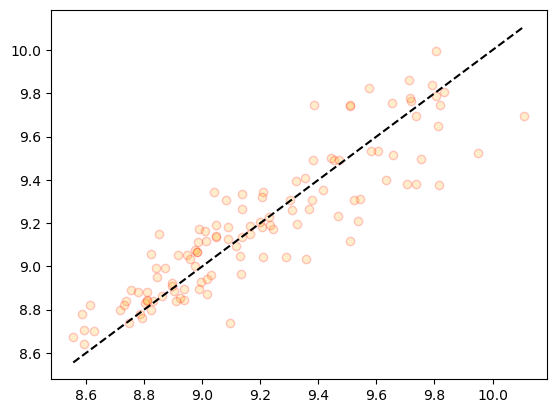

In [35]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.0368, RMSE: 0.1919, MSLE: 0.0003, RMSLE: 0.0186, R2: 0.7466


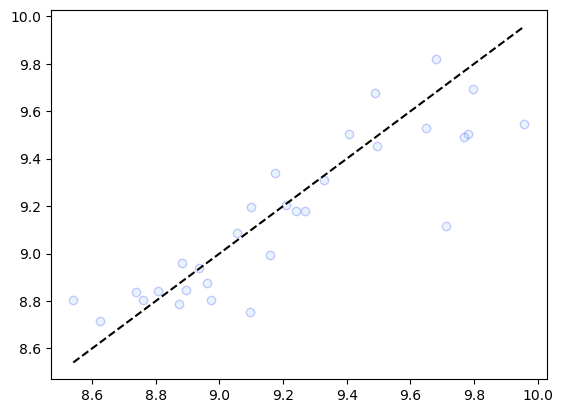

In [36]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='blue', c='skyblue', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

#### 🤔Train 데이터로 훈련하여 예측한 값들의 산점도가 Test 데이터로 훈련하여 예측한 값들의 산점도보다 분산이 낮기 때문에 과적합일 수도 있다.  
다음으론 규제를 통해 과적합을 해소해보도록 하겠다.

### 1. Lasso

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# alpha 값의 범위 설정
alpha_values = [0.1, 1, 5, 10, 15, 20, 25, 30, 50 ,100]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

for alpha in alpha_values:
    # Lasso 모델 정의
    lasso = Lasso(alpha=alpha, max_iter=1000, random_state=124)

    # Lasso 모델 학습
    lasso.fit(X_train, y_train)

    # 예측 수행
    prediction = lasso.predict(X_test)

    # 결과 출력
    print("Lasso Regression with alpha =", alpha)
    get_evaluation(y_test, prediction)

Lasso Regression with alpha = 0.1
MSE: 0.0433, RMSE: 0.2080, MSLE: 0.0004, RMSLE: 0.0200, R2: 0.7003
Lasso Regression with alpha = 1
MSE: 0.0486, RMSE: 0.2204, MSLE: 0.0004, RMSLE: 0.0212, R2: 0.6635
Lasso Regression with alpha = 5
MSE: 0.0493, RMSE: 0.2220, MSLE: 0.0005, RMSLE: 0.0213, R2: 0.6585
Lasso Regression with alpha = 10
MSE: 0.0491, RMSE: 0.2216, MSLE: 0.0005, RMSLE: 0.0213, R2: 0.6597
Lasso Regression with alpha = 15
MSE: 0.0494, RMSE: 0.2222, MSLE: 0.0005, RMSLE: 0.0214, R2: 0.6579
Lasso Regression with alpha = 20
MSE: 0.0501, RMSE: 0.2237, MSLE: 0.0005, RMSLE: 0.0216, R2: 0.6532
Lasso Regression with alpha = 25
MSE: 0.0512, RMSE: 0.2262, MSLE: 0.0005, RMSLE: 0.0219, R2: 0.6455
Lasso Regression with alpha = 30
MSE: 0.0527, RMSE: 0.2296, MSLE: 0.0005, RMSLE: 0.0223, R2: 0.6349
Lasso Regression with alpha = 50
MSE: 0.0631, RMSE: 0.2512, MSLE: 0.0006, RMSLE: 0.0245, R2: 0.5629
Lasso Regression with alpha = 100
MSE: 0.1189, RMSE: 0.3448, MSLE: 0.0011, RMSLE: 0.0338, R2: 0.1764


### 2. Ridge

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# alpha 값의 범위 설정
alpha_values = [0.1, 1, 5, 10, 15, 20, 25, 30, 50 ,100, 1000]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

for alpha in alpha_values:
    # Ridge 모델 정의
    ridge = Ridge(alpha=alpha, max_iter=1000, random_state=124)

    # Ridge 모델 학습
    ridge.fit(X_train, y_train)

    # 예측 수행
    prediction = ridge.predict(X_test)

    # 결과 출력
    print("Ridge Regression with alpha =", alpha)
    get_evaluation(y_test, prediction)

Ridge Regression with alpha = 0.1
MSE: 0.0359, RMSE: 0.1896, MSLE: 0.0003, RMSLE: 0.0182, R2: 0.7511
Ridge Regression with alpha = 1
MSE: 0.0359, RMSE: 0.1895, MSLE: 0.0003, RMSLE: 0.0182, R2: 0.7512
Ridge Regression with alpha = 5
MSE: 0.0360, RMSE: 0.1897, MSLE: 0.0003, RMSLE: 0.0183, R2: 0.7507
Ridge Regression with alpha = 10
MSE: 0.0361, RMSE: 0.1901, MSLE: 0.0003, RMSLE: 0.0183, R2: 0.7497
Ridge Regression with alpha = 15
MSE: 0.0363, RMSE: 0.1904, MSLE: 0.0003, RMSLE: 0.0183, R2: 0.7487
Ridge Regression with alpha = 20
MSE: 0.0364, RMSE: 0.1908, MSLE: 0.0003, RMSLE: 0.0184, R2: 0.7479
Ridge Regression with alpha = 25
MSE: 0.0365, RMSE: 0.1911, MSLE: 0.0003, RMSLE: 0.0184, R2: 0.7471
Ridge Regression with alpha = 30
MSE: 0.0366, RMSE: 0.1914, MSLE: 0.0003, RMSLE: 0.0184, R2: 0.7463
Ridge Regression with alpha = 50
MSE: 0.0370, RMSE: 0.1923, MSLE: 0.0003, RMSLE: 0.0185, R2: 0.7439
Ridge Regression with alpha = 100
MSE: 0.0376, RMSE: 0.1939, MSLE: 0.0003, RMSLE: 0.0186, R2: 0.7396


💡 Ridge를 통해 규제를 강화 해보았지만 R2 점수의 변동폭이 적었다.  
해당 훈련에는 과적합이 발생하지 않았다고 볼 수 있다.

---

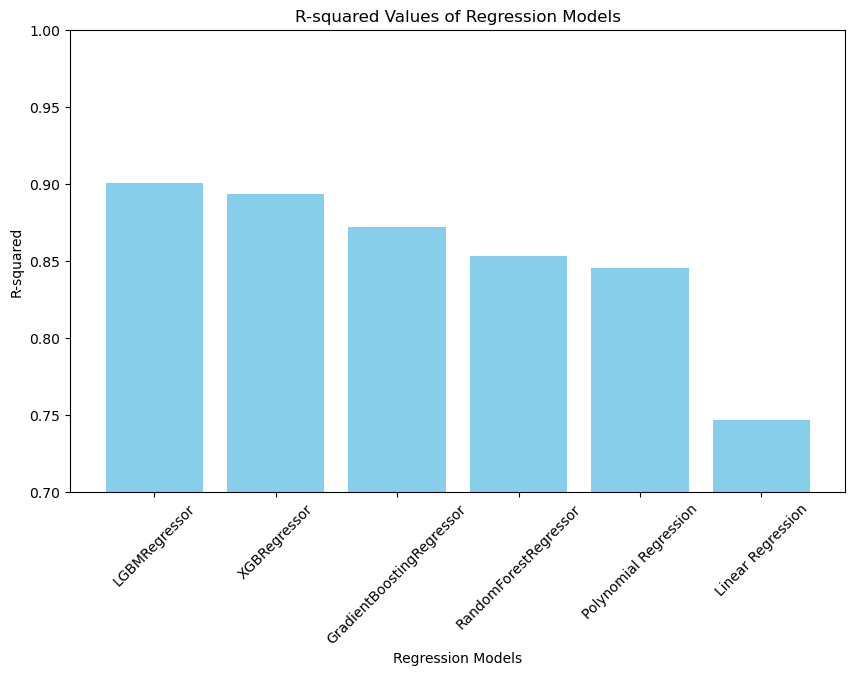

In [43]:
import matplotlib.pyplot as plt

# 모델 이름과 R-squared 값
models = ['LGBMRegressor', 'XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor', 'Polynomial Regression', 'Linear Regression']
r_squared = [0.9011, 0.8935, 0.8725, 0.8534, 0.8454, 0.7466]

plt.figure(figsize=(10, 6))
plt.bar(models, r_squared, color='skyblue')
plt.title('R-squared Values of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared')
plt.ylim(0.7, 1)  # y 축 범위 설정
plt.xticks(rotation=45)  # x 축 눈금 라벨 회전
plt.show()

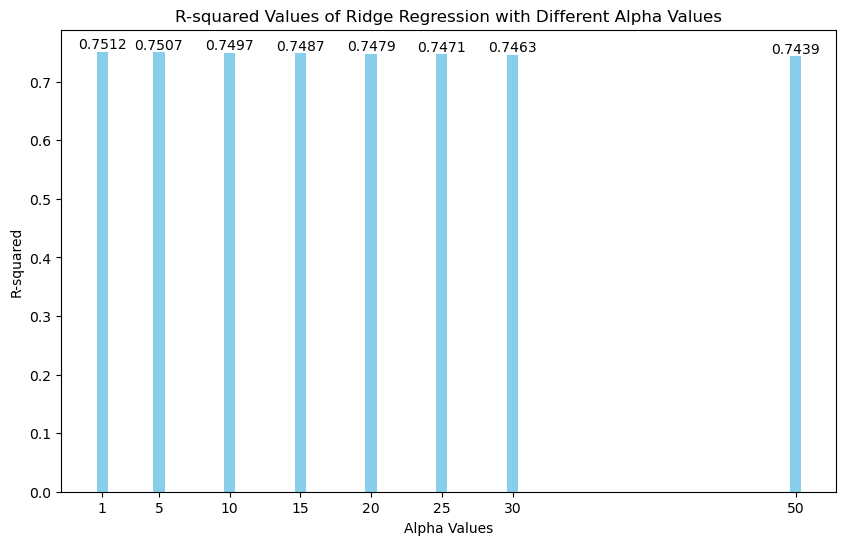

In [48]:
import matplotlib.pyplot as plt

alpha_values = [1, 5, 10, 15, 20, 25, 30, 50]
r_squared_values = [0.7512, 0.7507, 0.7497, 0.7487, 0.7479, 0.7471, 0.7463, 0.7439]

plt.figure(figsize=(10, 6))  # 그래프 크기 조정
plt.bar(alpha_values, r_squared_values, color='skyblue')
plt.title('R-squared Values of Ridge Regression with Different Alpha Values')
plt.xlabel('Alpha Values')
plt.ylabel('R-squared')
plt.xticks(alpha_values)  # x 축 눈금 라벨 설정

# 막대 위에 R-squared 값들을 표시
for i in range(len(alpha_values)):
    plt.text(alpha_values[i], r_squared_values[i], str(r_squared_values[i]), ha='center', va='bottom')

plt.show()

<img src="./datasets/345.png">

### 📋 결과
1. 위의 산점도를 보자면, 대부분의 독립변수와 종속변수(가격) 간에는 선형 관계보다는 비선형 관계가 더 강하게 나타나는 것으로 보인다.  
예를 들어, curbweight by price, enginesize by price, 그리고 horsepower by price 그래프에서는 가격이 증가함에 따라 해당 변수들의 값도 증가하는 경향이 있지만, 분포가 넓고 선형보다는 곡선 형태로 나타나는 것처럼 보인다.

2. 과적합을 확인 했을 때, ridge를 사용해서 alpha 값 별로 R2 점수들을 확인 했을 때, 크게 변동이 없었다.  
   이로써, <strong>과적합이 없었다</strong>는 걸 알 수 있었다.
    
3. 해당 데이터 세트에서 가장 R2 점수가 높게 나왔던 model은 <strong>LGBMRegressor 모델이 이었고, 점수는 0.9011</strong> 이었다.

위의 내용들을 요약 하자면, 해당 데이터 세트는 <strong>비선형 데이터 세트</strong>이며, 가장 적합한 모델은 <strong>LGBMRegressor</strong> 이다.